### `Step-1`first we create the plot of every movie -- text of full movie
### `Step-2` then we genrate the embedding vector of each movie
### `Step-3` then calculate the cosine similarty between those embedding vectors.

## `Challenges during the genration of embedding vector`
### 1- gen embedding vectors
### 2- storage challenge(can't store in genral database sql bcoz can't calculate the cosine similarty)
### 3- Semantic search

- To solve these problem vector stores are used

# What are Vector Stores

- A vector store is a system designed to store and retrieve data represented as numerical vectos.

## Key Features

- Storage = Provide the storage  in RAM or Memory both
- Similarity Search = helps o retrieve the vectors most similar to a querry vector
- Indexing = enable faster semantic search(approximate nearest neighbor lookups)
- CRUD Operationns - Manage the lifecycle of data - adding new vectors , reading them, updating existing entries, removing outdated vectors.

## Use-cases
- Semantic Search
- RAG
- Recommender Systems
- Image/Multimedia Search

## Vector Store vs Vector Database

- Vector Storage - system in which storage + Retriveal `FAISS`
- ideal for smaller-scale applications, ideal for prototyping
- Vector Database - vector store + Distributed Architecture + Backup & restore + ACID Transaction + Concurrence + Authentical `Pincone`
- har Vectore database data vector hi hota hai, but har vector store vector database nahi hota hai.


# Chroma Vector Store

Chroma is a lightweight, open-source vector database that is especially friendly for local development and small to medium scale production needs

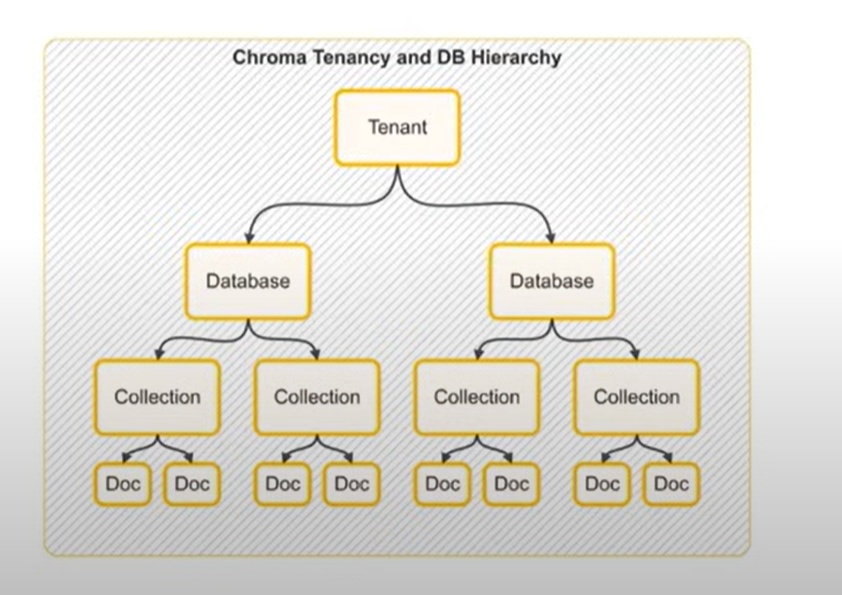

- Tenant - user
- Database - each database
- Collection - Table
- Doc - embedding or metadata

Here’s a **complete comparison and summary** of how to use the **three most popular vector databases** in LangChain:

---

## 🔍 **Document Vector Store Comparison: FAISS vs Chroma vs Pinecone**

| Feature / Operation     | **FAISS** (Local) 🖥️              | **Chroma** (Local+Lightweight DB) 📦 | **Pinecone** (Cloud) ☁️            |
| ----------------------- | ---------------------------------- | ------------------------------------ | ---------------------------------- |
| **Storage Location**    | Local (.faiss file)                | Local / In-memory DB (.chromadb)     | Cloud (Pinecone index)             |
| **Persistent**          | ✅ Yes (save/load)                  | ✅ Yes (with persist\_directory)      | ✅ Yes                              |
| **Cloud / Scalable**    | ❌ No                               | ❌ No                                 | ✅ Yes (Cloud-native)               |
| **Real-time Updates**   | ❌ No (must rebuild)                | ✅ Yes                                | ✅ Yes                              |
| **Deletion Support**    | ⚠️ Manual (rebuild index)          | ✅ Yes (via `delete`)                 | ✅ Yes (via `delete`)               |
| **Update Support**      | ⚠️ Manual (rebuild)                | ✅ Yes (delete + add)                 | ✅ Yes (delete + add)               |
| **Add Documents**       | ✅ `from_documents()`               | ✅ `from_documents()`                 | ✅ `from_documents()`               |
| **Search (with score)** | ✅ `similarity_search_with_score()` | ✅ `similarity_search_with_score()`   | ✅ `similarity_search_with_score()` |
| **Metadata Search**     | ❌ Not natively                     | ✅ Yes                                | ✅ Yes                              |
| **Speed**               | 🚀 Very fast (local, C++)          | ⚡ Fast (local, Pythonic)             | ⚡ Depends on network               |
| **Best For**            | Prototyping, local demo            | Light apps with structured queries   | Production-grade scale             |

---

## ✅ FAISS – Local Vector Store (Best for Prototyping)

```python
from langchain.vectorstores import FAISS

# Create
faiss_index = FAISS.from_documents(docs, embedding)

# Save & Load
faiss_index.save_local("faiss_index")
faiss_index = FAISS.load_local("faiss_index", embedding)

# Search
faiss_index.similarity_search_with_score("query", k=2)
```

❌ No direct delete/update. You need to **rebuild index** by filtering out unwanted docs.

---

## ✅ Chroma – Lightweight Local DB (Feature-Rich, Fast)

```python
from langchain.vectorstores import Chroma

# Create
chroma_index = Chroma.from_documents(docs, embedding, persist_directory="chroma_db")
chroma_index.persist()

# Load
chroma_index = Chroma(persist_directory="chroma_db", embedding_function=embedding)

# Search
chroma_index.similarity_search_with_score("query", k=2)

# Delete
chroma_index.delete(ids=["doc1"])

# Update
chroma_index.delete(["doc1"])
chroma_index.add_documents([updated_doc], ids=["doc1"])
```

✅ Fast, allows filtering, metadata search, and flexible document operations.

---

## ✅ Pinecone – Cloud Vector DB (Best for Production)

```python
from langchain.vectorstores import Pinecone
import pinecone

# Init Pinecone
pinecone.init(api_key="your-key", environment="your-env")

# Create or connect
pinecone_index = Pinecone.from_documents(docs, embedding, index_name="ipl-index", ids=["kohli", ...])

# Load existing
pinecone_vector = Pinecone.from_existing_index("ipl-index", embedding)

# Search
pinecone_vector.similarity_search_with_score("Who is captain cool?", k=2)

# Delete
pinecone_vector.index.delete(ids=["kohli"])

# Update
pinecone_vector.index.delete(["dhoni"])
pinecone_vector = Pinecone.from_documents([updated_doc], embedding, index_name="ipl-index", ids=["dhoni"])
```

✅ Ideal for scalable applications, multi-user environments, real-time APIs.

---

## 🏁 Final Recommendation

| Use Case                                     | Recommended DB |
| -------------------------------------------- | -------------- |
| **Quick testing / offline prototyping**      | FAISS          |
| **Local + full CRUD + light app deployment** | Chroma         |
| **Cloud-based production / scaling**         | Pinecone       |

---

Would you like me to give you a **starter script** that lets you switch between the 3 databases easily using a config flag (e.g., `db = "faiss"`)?
